# Анализ А/В теста для крупного интернет-магазина

## Оглавление
* [ЦЕЛЬ: Анализ гипотез, анализ результатов АВ теста](#step1)

* [План исследования](#step2)

* [Описание данных](#step3)

* [Исследование](#step4)
    * [Часть 1. Приоритизация гипотез](#step5)
    * [Часть 1. Вывод](#step6)
    * [Часть 2 Анализ A/B-теста](#step7)
    * [Часть 2. Вывод](#step8)
           
* [Общие выводы](#step9)

## ЦЕЛЬ: Анализ гипотез, анализ результатов А/В теста  <a id="step1"></a> 

Задача отдела аналитики и маркетинга крупного интернет-магазина - выбрать из ряда гипотез наиболее переспективные, т.е. провести приоритизацию гипотез. После проведения и получения результатов А/В теста, которые описаны в файлах orders.csv и visitors.csv, сделать выводы об успешности А/В теста и принять решение о продлении, или успешном/неудачном завершении тестирования.


## План исследования:  <a id="step2"></a> 

**1. Часть - приоритизация гипотез:**

1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
1. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
1. Сделать выводы о том, как изменилась приоритизация гипотез при применении RICE вместо ICE.

**2. Часть - анализ результатов А/В теста:**

В этом шаге нужно проделать следующие этапы анализа A/B-теста:

1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
1. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
1. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
1. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
1. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
1. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
1. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
1. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
1. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
1. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
1. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
1. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
1. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

**Общие выводы**

По результатам теста и на основании проделанных исследований необходимо принять решение о продолжении, или завершении тестирования. Варианты решений: 
   1. Остановить тест, зафиксировать победу одной из групп. 
   1. Остановить тест, зафиксировать отсутствие различий между группами. 
   1. Продолжить тест.


## Описание данных:  <a id="step3"></a> 


**Таблица hypothesis (9 гипотез по увеличению выручки интернет-магазина):**

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Таблица orders (информация о заказах, получена в результате A/B-теста):**
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

**Таблица visitors (информация о затратах посетителях, получена в результате A/B-теста):**
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Исследование <a id="step4"></a> 


## Часть 1. Приоритизация гипотез  <a id="step5"></a> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
from IPython.display import display
pd.set_option('display.max_columns', None) 
pd.options.display.max_colwidth = 110

In [2]:
# hypothesis = pd.read_csv('/datasets/hypothesis.csv')
# orders = pd.read_csv('/datasets/orders.csv')
# visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hypothesis = pd.read_csv('/Users/mariia/Documents/python/седьмой спринт/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Посмотрим на типы данных в таблице:

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


С типами данных все в порядке, можно перейти к приоритизации гипотез. Применим в первую очаредь фреймворк ICE: 

ICE Score = Impact * Confidence / Efforts

In [5]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 2)
display(hypothesis.loc[:, ['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))
print('\n')
print(f"В результате применения фреймворка ICE лидирует гипотеза - {hypothesis[hypothesis['ICE'] == hypothesis['ICE'].max()].loc[:, 'Hypothesis'].iloc[0]}.")
      

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00




В результате применения фреймворка ICE лидирует гипотеза - Запустить акцию, дающую скидку на товар в день рождения.


Теперь применим фреймворк RICE: 

RICE Score = Reach * Impact * Confidence / Efforts

In [6]:
hypothesis['RICE'] = (round((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / 
                            hypothesis['Efforts'], 2))
display(hypothesis.loc[:, ['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))
print('\n')
print(f"В результате применения фреймворка RICE лидирует гипотеза - {hypothesis[hypothesis['RICE'] == hypothesis['RICE'].max()].loc[:, 'Hypothesis'].iloc[0]}.")
      

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0




В результате применения фреймворка RICE лидирует гипотеза - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.


## Часть 1. Вывод  <a id="step6"></a> 

К списку гипотез было применено два фреймворка: ICE и RICE. Второй фреймворк учитывает не только Impact (насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта), Confidence (насколько вы уверены, что это изменение повлияет на пользователей именно так) и Efforts (сколько стоит протестировать эту гипотезу), но и параметр Reach (скольких пользователей затронет изменение, которое вы хотите внести).

По результатам провеления ICE мы получили рейтинг гипотез, отличающихся примерно на 20%. При учёте фактора количества задействованных в изменениях пользователей, получен рейтинг, где значение RICE у лидера превышает в два раза показатель следующей строчки (112 против 56). Таким образом, учёт фактора Reach вносит очень серьёзный вклад в модель приоритизации гипотез.

Итого, следующей гипотезой для проведения A/B теста выбрана гипотеза номер 7: **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**.

## Часть 2. Анализ результатов А/В теста  <a id="step7"></a> 

Перед тем, как перейти к самому анализу, проделаем предобработку: выведем данные, проверим типы данных, наличие дубликатов и пропусков:

In [7]:
visitors = pd.read_csv('/Users/mariia/Documents/python/седьмой спринт/visitors.csv')
orders = pd.read_csv('/Users/mariia/Documents/python/седьмой спринт/orders.csv')

In [7]:
data_list = [visitors, orders]
data_names = ['visitors', 'orders']
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    print(data_list[i].shape)
    display(data_list[i].head())

visitors

(62, 3)


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


orders

(1197, 5)


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Из таблицы visitors видим, что A/B тест длится уже 31 день. В таблице orders видим представителей двух групп А и В. Проверим типы данных, дубликаты и пропуски:

In [8]:
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    print(data_list[i].info(), end='\n\n')

visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None



Нужно сменить формат даты в обеих таблицах с object на datetime:

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    print(data_list[i].duplicated().sum(), end='\n\n')

visitors

0

orders

0



In [11]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Видим, что стандартное отклонение для выручки превышает медиану и среднее значение, распределение не является нормальным, значит, для всех статистических проверок будем применять непараметрический метода Манна-Уитни. 

In [12]:
len(orders['visitorId'].unique())

1031

В тесте уже поучаствовал 1031 пользователь.

Дубликатов и пропусков в данных нет, типы данных изменены. Проверим, нет ли в выборке пользователей, которые поучаствовали в обоих тестах:

In [13]:
visitorId_list = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index()
visitors_two_times = visitorId_list[visitorId_list['group'] == 2]['visitorId']
display(visitors_two_times.head(5))
print(len(visitors_two_times))

2       8300375
44    199603092
51    232979603
55    237748145
66    276558944
Name: visitorId, dtype: int64

58


Есть пользователи, которые попали в обе выборки, их 58.

In [14]:
orders[orders['visitorId'] == 199603092]

,transactionId,visitorId,date,revenue,group
26,2223239646,199603092,2019-08-15,3488,A
134,62794304,199603092,2019-08-22,6976,A
246,437656952,199603092,2019-08-02,3488,B
823,2971973105,199603092,2019-08-27,2790,A
1102,1941707234,199603092,2019-08-12,6438,A


По правилам проведения A/B тестов, один и тот же пользователь не должен попадать в разные группы. Удалим пользователей, поучаствовавших в обоих тестах, из наших данных:

In [15]:
mistakes_visits = (orders[orders['visitorId'].isin(visitors_two_times)]
                   .groupby(['date', 'group']).agg({'transactionId' : 'count'}).reset_index())
visitors = visitors.merge(mistakes_visits, how='left', left_on=['date', 'group'], right_on=['date', 'group'])
visitors = visitors.fillna(0)


In [16]:
visitors['visitors_right'] = visitors['visitors'] - visitors['transactionId']
visitors['visitors_right'] = visitors['visitors_right'].astype(int)
visitors_new = visitors[['date', 'group', 'visitors_right']]
visitors_new.rename(columns={'visitors_right': 'visitors'}, inplace=True)
visitors_new

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,date,group,visitors
0,2019-08-01,A,718
1,2019-08-02,A,618
2,2019-08-03,A,507
3,2019-08-04,A,712
4,2019-08-05,A,753
...,...,...,...
57,2019-08-27,B,715
58,2019-08-28,B,648
59,2019-08-29,B,526
60,2019-08-30,B,487


Проверим, распределены ли все пользователи точно пополам при проведеннии A/B теста:

In [17]:
visitorsADaily = visitors_new[visitors_new['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily = visitors_new[visitors_new['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


In [18]:
print(f"""За все время тестирования группы различаются на {abs(visitorsADaily['visitorsPerDateA'].sum() - visitorsBDaily['visitorsPerDateB'].sum())} человек, т.е. приблизительно на {round(abs(100 * (visitorsADaily['visitorsPerDateA'].sum() - visitorsBDaily['visitorsPerDateB'].sum()) / visitorsADaily['visitorsPerDateA'].sum()), 1)}%.""")


За все время тестирования группы различаются на 177 человек, т.е. приблизительно на 0.9%.


Теперь нужно очистить список orders от пользователей, поучаствовавших в обоих тестах:

In [19]:
orders_new = orders[np.logical_not(orders['visitorId'].isin(visitors_two_times))]
orders_new.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [20]:
#проверим, произвелось ли удаление
orders_new[orders_new['visitorId'] == 199603092]

,transactionId,visitorId,date,revenue,group


Теперь будем считать разделение на группы верным. Перейдём к задачам этого шага, все вычисления будем производить по обновлённым таблицам:

1. Построим график кумулятивной выручки по группам:

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_new[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups.apply(lambda x: orders_new[np.logical_and(orders_new['date'] 
                    <= x['date'], orders_new['group'] == x['group'])].
                        agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 
                            'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).
                        sort_values(by=['date','group']))

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (datesGroups.apply(lambda x: visitors_new[np.logical_and(visitors_new['date'] <= x['date'],
                    visitors_new['group'] == x['group'])].
                                        agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).
                                        sort_values(by=['date','group']))
# объединяем кумулятивные данные
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,718
1,2019-08-01,B,17,17,59758,709
2,2019-08-02,A,42,36,234381,1336
3,2019-08-02,B,40,39,221801,1289
4,2019-08-03,A,66,60,346854,1843


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


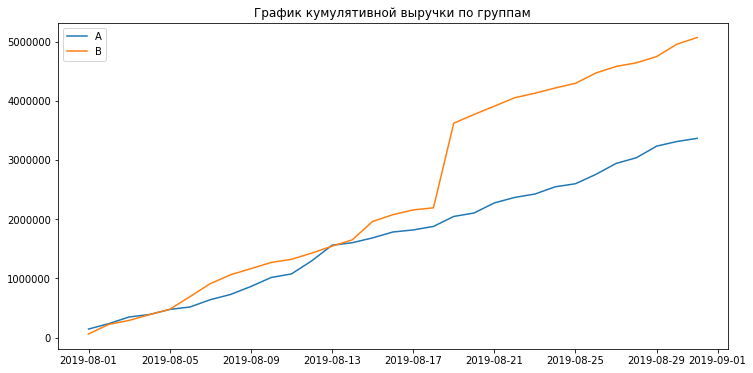

In [22]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 6))
plt.title('График кумулятивной выручки по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.show()

В первые несколько дней графики групп А и В шли практически одинаково, затем группа В вышла в лидеры. Приблизительно 19 августа произошёл резкий скачёк выручки в группе В, вероятно какой-то крупный заказ. Далее графики кумулятивной выручки групп А и В установились. **Без учёта выбросов по результатам тестирования группа В видится более успешной.**

2. Построим график кумулятивного среднего чека по группам:

 Разделим кумулятивную выручку на кумулятивное число заказов:

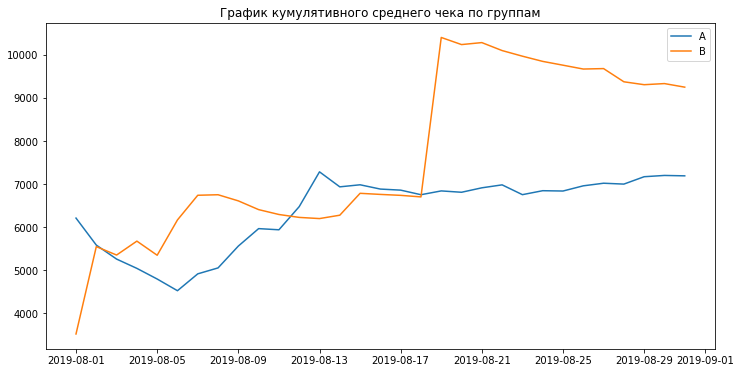

In [23]:
plt.figure(figsize=(12, 6))
plt.title('График кумулятивного среднего чека по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.show()

Средний чек становится равномерным ближе к концу теста: слабо растёт для группы A и падает для группы B. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A:

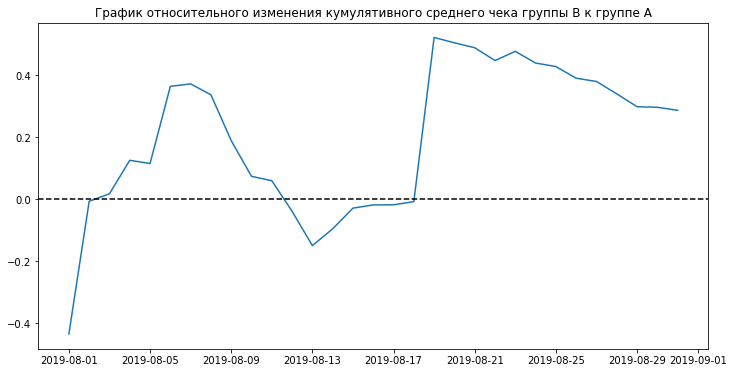

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                    right_on='date', how='left', suffixes=['A', 'B']))
plt.figure(figsize=(12, 6))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

В нескольких точках происходят сильные изменения кумулятивного среднего чека, т.е. данные нужно очистить от выбросов.

4. Построим график кумулятивной конверсии по группам:

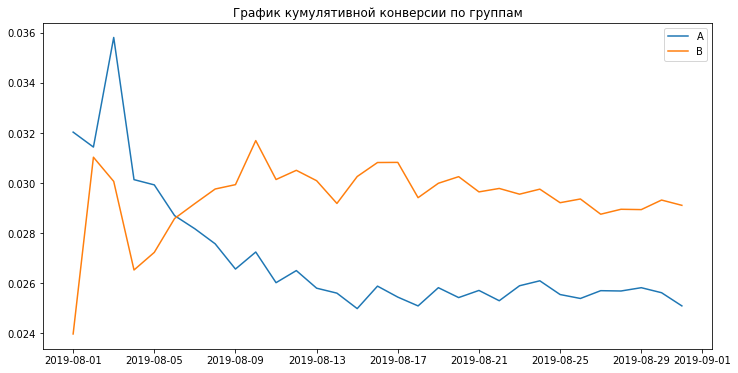

In [25]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 6))
plt.title('График кумулятивной конверсии по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.show()

В начале графика наблюдаем "эффект подсматривания", затем графики коляблятся, но кумулятивная конверсия группы В превышает кумулятивную конверсию группы А. Можно предположить, что тренд группы А установился (значения колеблятся около одного и того же значения), в то время, как тренд группы В хоть и превышает значения для группы А, но является падающим. Для более уверенных выводов нужно больше времени.

5. Построим график относительного изменения кумулятивной конверсии группы B к группе A:

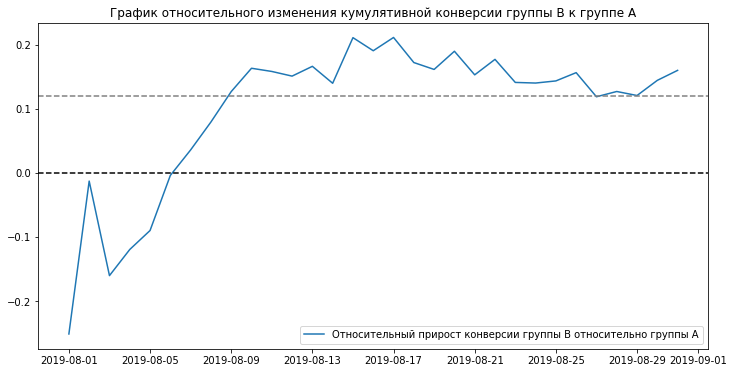

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')

plt.show()

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Для дальнейших выводов нужно убрать аномалии из данных.

6. Построим точечный график количества заказов по пользователям:

Перед построением точечного графика посмотрим сначала на распределение количества заказов (построим гистограмму):

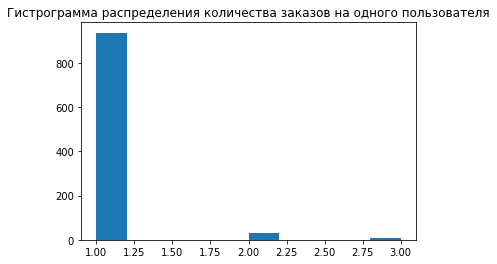

In [28]:
ordersByUsers = (orders_new.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique}))
ordersByUsers.columns = ['visitorId','orders']
plt.hist(ordersByUsers['orders'])
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.show()

Видим, что в основном один пользователь делает только один заказ, есть ещё значительно число пользователей с двумя и тремя заказами. Посмотрим теперь на точечный график количества заказов по пользователям:

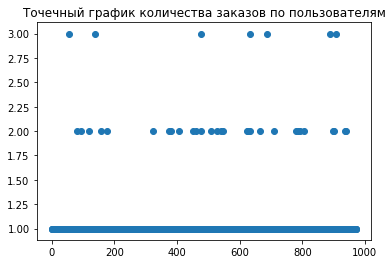

In [29]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.show()

Пользователи с тремя заказами - явно аномалии. Но в датасете ещё много пользователей с двумя заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей:

In [30]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляли больше чем 1 (т. е. 2) заказа. И 1% пользователей заказывали более двух раз. **Выберем в качестве границы для определения аномальных пользователей 2 заказа.**

8. Построить точечный график стоимостей заказов:

Поступим также, как в предыдущем пункте, построив сначала гистограмму распределения стоимостей заказов. 

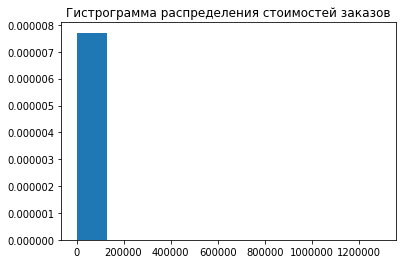

In [31]:
plt.hist(orders_new['revenue'], density=True)
plt.title('Гистрограмма распределения стоимостей заказов')
plt.show()

Все заказы лежат в диапазоне примерно до 16000. По гистограмме аномальных значений не обнаружено. Посмотрим на точечный график.

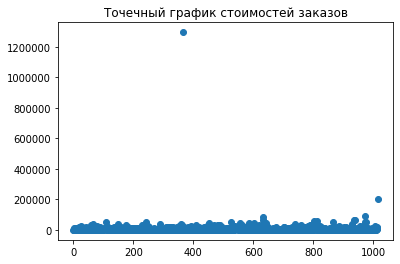

In [32]:
x_values = pd.Series(range(0,len(orders_new['revenue'])))
plt.scatter(x_values, orders_new['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.show()

Видим два заведомо аномальных значения. После подсчёта перцентилей будет более понятно, где устанавиливать границу аномальных значений.

9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов:

In [33]:
np.percentile(orders_new['revenue'], [95, 99])

array([26785., 53904.])

**Возьмём в качестве аномальной стоимость заказа в 26785.**

10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным:

Создадим сначала полную базу данных, где каждой дате будут соответствовать как нормальные параметры, так и кумулятивные:

In [34]:
ordersADaily = (orders_new[orders_new['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}))

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (orders_new[orders_new['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


In [35]:
cumulativeVisitorsA = cumulativeData[cumulativeData['group']=='A'][['date','visitors']]
cumulativeVisitorsB = cumulativeData[cumulativeData['group']=='B'][['date','visitors']]

In [36]:
mergedCumulativeVisitors = (cumulativeVisitorsA.merge(cumulativeVisitorsB, left_on='date', 
                                                    right_on='date', how='left', suffixes=['A', 'B']))
mergedCumulativeData = (mergedCumulativeVisitors.merge(mergedCumulativeRevenue, left_on='date', 
                                                    right_on='date', how='left'))

mergedCumulativeData.rename(
    columns={'visitorsA': 'visitorsCummulativeA', 'visitorsB': 'visitorsCummulativeB', 
             'revenueA': 'revenueCummulativeA', 'revenueB': 'revenueCummulativeB', 
             'ordersA': 'ordersCummulativeA', 'ordersB': 'ordersCummulativeB'}, inplace=True)

mergedCumulativeData.head()

,date,visitorsCummulativeA,visitorsCummulativeB,revenueCummulativeA,ordersCummulativeA,revenueCummulativeB,ordersCummulativeB
0,2019-08-01,718,709,142779,23,59758,17
1,2019-08-02,1336,1289,234381,42,221801,40
2,2019-08-03,1843,1796,346854,66,288850,54
3,2019-08-04,2555,2563,388030,77,385740,68
4,2019-08-05,3308,3268,474413,99,475648,89


In [37]:
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(mergedCumulativeData, left_on='date', right_on='date', how='left'))

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB,revenueCummulativeA,ordersCummulativeA,revenueCummulativeB,ordersCummulativeB
0,2019-08-01,23,142779,17,59758,718,709,718,709,142779,23,59758,17
1,2019-08-02,19,91602,23,162043,618,580,1336,1289,234381,42,221801,40
2,2019-08-03,24,112473,14,67049,507,507,1843,1796,346854,66,288850,54
3,2019-08-04,11,41176,14,96890,712,767,2555,2563,388030,77,385740,68
4,2019-08-05,22,86383,21,89908,753,705,3308,3268,474413,99,475648,89


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [38]:
ordersByUsersA = (orders_new[orders_new['group']=='A'].groupby('visitorId', as_index=False).
                  agg({'transactionId' : pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders_new[orders_new['group']=='B'].groupby('visitorId', as_index=False).
                  agg({'transactionId' : pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']
ordersByUsersB.head(5)

,visitorId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [39]:
sampleA = (pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() 
                    - len(ordersByUsersA['orders'])), name='orders')],axis=0))

sampleB = (pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()
                    - len(ordersByUsersB['orders'])), name='orders')],axis=0))
sampleA.head(5)

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

В sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

In [40]:
alpha = .05 # критический уровень статистической значимости

results = stats.mannwhitneyu(sampleA, sampleB)
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', "{0:.3f}".format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет.")
else:
    print("Не получилось отвергнуть нулевую гипотезуо том, что статистически значимых различий в конверсии между группами нет.")

p-значение:  0.005
Отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет.


In [41]:
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.160


Итак, по сырым данным получилось, что **конверсии групп А и В имеют статистические различия. Относительный проигрыш группы А равен 16%.**

11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.

In [42]:
results = stats.mannwhitneyu(orders_new[orders_new['group']=='A']['revenue'], orders_new[orders_new['group']=='B']['revenue'])
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', "{0:.3f}".format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет.")
else:
    print("Не получилось отвергнуть нулевую гипотезуо том, что статистически значимых различий в среднем чеке между группами нет.")


p-значение:  0.415
Не получилось отвергнуть нулевую гипотезуо том, что статистически значимых различий в среднем чеке между группами нет.


In [43]:
print(f"Относительные различия в среднем чеке между группами составляют {round((orders_new[orders_new['group']=='B']['revenue'].mean()/orders_new[orders_new['group']=='A']['revenue'].mean()-1) * 100, 1)}%.")


Относительные различия в среднем чеке между группами составляют 28.7%.


На основании сырых данных, **не получилось отвергнуть нулевую гипотезуо том, что статистически значимых различий в среднем чеке между группами нет. При этом мы имеем относительные различия в среднем чеке почти в 29%.**

12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным:

Для начала очистим данные от аномалий. Выше в качестве аномальной была принята стоимость заказа в 28000, а количество аномальных заказов - 3. Выделем пользователей со стоимостью заказов и их количеством превышающими граничные значения, в отдельную таблицу:

In [44]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] >= 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders_new[orders_new['revenue'] > 26758]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(abnormalUsers.head(5))
print(f"В наших данных {abnormalUsers.shape[0]} аномальных пользователей из {orders_new['visitorId'].nunique()}, т.е. {round((abnormalUsers.shape[0]/orders_new['visitorId'].nunique())*100)}%.")
      

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64

В наших данных 86 аномальных пользователей из 973, т.е. 9%.


Теперь подготовим очищенные выборки:

In [45]:
sampleAFiltered = (pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                    .isin(abnormalUsers))]['orders'],
                    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                              name='orders')],axis=0))

sampleBFiltered = (pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                    .isin(abnormalUsers))]['orders'],
                    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                              name='orders')],axis=0))
                   

In [46]:
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', "{0:.3f}".format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет.")
else:
    print("Не получилось отвергнуть нулевую гипотезуо том, что статистически значимых различий в конверсии между группами нет.")

p-значение:  0.008
Отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет.


In [47]:
print(f"Относительные различия в конверсии между группами составляют {round((sampleBFiltered.mean()/sampleAFiltered.mean()-1) * 100, 1)}%.")


Относительные различия в конверсии между группами составляют 17.4%.


Результаты по очищенным данным по конверсии не изменились.

13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным:

In [48]:
results = (stats.mannwhitneyu(
    orders_new[np.logical_and(
        orders_new['group']=='A',
        np.logical_not(orders_new['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders_new[np.logical_and(
        orders_new['group']=='B',
        np.logical_not(orders_new['visitorId'].isin(abnormalUsers)))]['revenue']))

p_value = results[1]
print('p-значение: ', "{0:.3f}".format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет.")
else:
    print("Не получилось отвергнуть нулевую гипотезуо том, что статистически значимых различий в среднем чеке между группами нет.")



p-значение:  0.364
Не получилось отвергнуть нулевую гипотезуо том, что статистически значимых различий в среднем чеке между группами нет.


In [49]:
print("Относительные различия в среднем чеке между группами составляют {0:.1%}".format(
    orders_new[np.logical_and(orders_new['group']=='B',np.logical_not(orders_new['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_new[np.logical_and(
        orders_new['group']=='A',
        np.logical_not(orders_new['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))


Относительные различия в среднем чеке между группами составляют -3.4%


Мы по-прежнему не можем отвергнуть нулевую гипотезу об отсутствии статистически значимых различий в среднем чеке между двумя группами, но разница между относительными различиями упала с 28% до 2% и поменяла знак. Как видим, удаление аномальных значений оказало сильное влияние на результы A/B теста.

Посмотрим заново на график кумулятивной выручки по группам, после удаления аномальных данных:

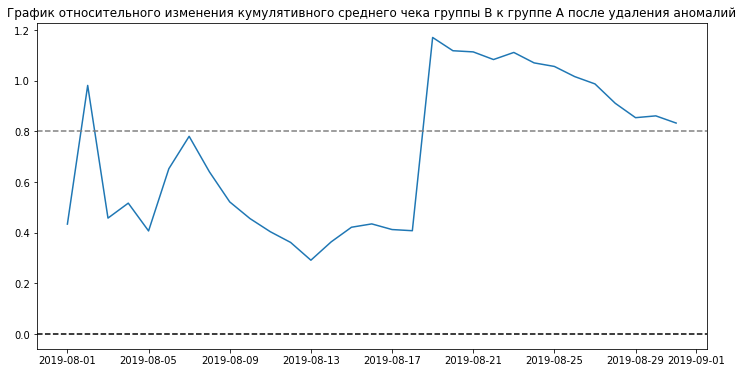

In [50]:
ordersFiltered = orders_new[np.logical_not(orders_new['visitorId'].isin(abnormalUsers))]
ordersADailyFiltered = ordersFiltered[ordersFiltered['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADailyFiltered.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulativeFiltered = ordersADailyFiltered.apply(
    lambda x: \
        ordersADailyFiltered[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulativeFiltered.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDailyFiltered = ordersFiltered[ordersFiltered['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDailyFiltered.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulativeFiltered = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulativeFiltered.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

ordersCummulativeFiltered = (ordersACummulativeFiltered.merge(ordersBCummulativeFiltered, left_on='date', 
                                                    right_on='date', how='left'))
plt.figure(figsize=(12, 6))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A после удаления аномалий')
# cтроим отношение средних чеков
plt.plot(ordersCummulativeFiltered['date'], (ordersCummulativeFiltered['revenueCummulativeB']/ordersCummulativeFiltered['ordersCummulativeB'])/(ordersCummulativeFiltered['revenueCummulativeA']/ordersCummulativeFiltered['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.8, color='grey', linestyle='--')
plt.show()

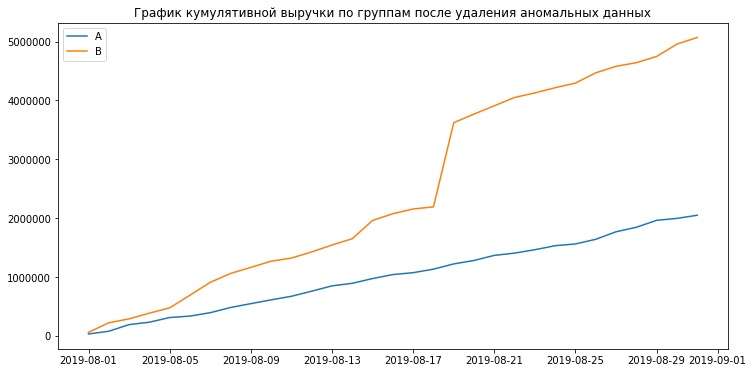

In [51]:
plt.figure(figsize=(12, 6))
plt.title('График кумулятивной выручки по группам после удаления аномальных данных')
plt.plot(ordersCummulativeFiltered['date'], ordersCummulativeFiltered['revenueCummulativeA'], label='A')
plt.plot(ordersCummulativeFiltered['date'], ordersCummulativeFiltered['revenueCummulativeB'], label='B')

plt.legend()
plt.show()

In [52]:
ordersFiltered['revenue'].describe()

count      887.000000
mean      4954.173619
std       5584.474860
min         50.000000
25%       1125.000000
50%       2640.000000
75%       6513.000000
max      26550.000000
Name: revenue, dtype: float64

Не смотря на удаление аномальных данных, кумулятивная выручка группы В лучше кумулятивной выручки группы А на всем периоде тестирования. 

Проверим на всякий случай, равномерно ли произвелось удаление аномальных данных:


In [53]:
print(f"Из группы А было удалено {len(sampleA) - len(sampleAFiltered)} записей.")
print(f"Из группы В было удалено {len(sampleB) - len(sampleBFiltered)} записей.")

Из группы А было удалено 39 записей.
Из группы В было удалено 47 записей.


Из обеих групп было удалено практически одинаковое число записей.

## Часть 2. Вывод  <a id="step8"></a> 

A/B тест проводился для гипотезы: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок."

В результате анализа результатов A/B теста было установлено:

* конверсия группы B превышает конверсию группы А и по «сырым» данным, и по данным после фильтрации аномалий;
* после фильтрации аномалий конверсия группы B на 19% лучше конверсии группы А;
* нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* после фильтрации аномалий средний чек группы А на 2% лучше среднего чека группы B;
* график различия конверсии между группами сообщает, что результаты группы B лучше группы A на всем промежутке времени (кроме первых нескольких дней), но он ещё не установился;
* график различия среднего чека говорит о том, что результаты группы B лучше результатов группы А на всём периоде тестирования, но, как указано выше, это различие не является статистически значимым.

Исходя из формулировки гипотезы, нашей задачей не является увеличение выручки (хотя и уменьшение, очевидно, не желательный результат нововведений). Мы установили, что конверсия группы В лучше конверсии группы А, это означает, что мы соберём бОльшую базу клиентов для email-рассылок, если это не отразится на выручке, то можно признать результаты A/B теста успешными. С другой стороны, возможно, что мы подталкиваем большее количество пользователей к покупкам с меньшим средним чеком, что может привести в свою очаредь к увеличению операционных расходов. Этот момент нужно уточнить у заказчика исследования, а именно: достаточно ли увеличившейся конверсии и отсутствия статистически значимой разницы в среднем чеке для признания теста успешным.

## Общие выводы  <a id="step9"></a> 

В ходе исследования проделана преоритезация гипотез на основе фреймворка RICE, в результате для реализации A/B теста выбрана гипотеза номер семь: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок."

В результате анализа результатов A/B теста выявлена необходимость уточнить у заказчика, является ли увеличение только конверсии (при неизменной выручке) основанием для признания результатов теста успешными. В случае положительного ответа, остановить тестирование и признать A/B тест успешным. 